In [2]:
import pandas as pd
import os
import io

# Lista com TODOS OS 13 arquivos
arquivos_todos_13 = [
    'ctccusto.parquet',
    'ctcontas.parquet',
    'ctlancto.parquet',
    'efentradas.parquet',
    'efmvepro.parquet',
    'efprodutos.parquet',
    'efsaidas.parquet',
    'efservicos.parquet',
    'foempregados.parquet',
    'foeventos.parquet', # Assumindo o nome base
    'FOMOVTO.parquet',
    'geempre.parquet',
    'PMBEM.parquet'
]

# --- CORREÇÃO AQUI ---
# Saindo da pasta 'notebooks' (../) para a raiz, e entrando em 'amostras/'
pasta_amostras = '../amostras'

print("--- INICIANDO MAPEAMENTO DOS 13 ARQUIVOS PARQUET ---")
print(f"Lendo da pasta: {os.path.abspath(pasta_amostras)}") # Mostra o caminho completo

# Vamos guardar tudo num buffer de texto
buffer_saida = io.StringIO()

for file_name in arquivos_todos_13:
    # O caminho relativo agora é ../amostras/nome_do_arquivo.parquet
    file_path = os.path.join(pasta_amostras, file_name)
    
    try:
        # Checa se o arquivo existe antes de tentar ler
        if not os.path.exists(file_path):
            buffer_saida.write(f"\n!!! ATENÇÃO: Arquivo não encontrado em '{file_path}' !!!\n")
            continue # Pula para o próximo

        df = pd.read_parquet(file_path)
        
        buffer_saida.write(f"\n=========================================\n")
        buffer_saida.write(f"### DADOS PARA: {file_name} ###\n")
        buffer_saida.write(f"=========================================\n")
        
        # Captura o df.info()
        buffer_info = io.StringIO()
        df.info(buf=buffer_info)
        
        buffer_saida.write(f"\n--- SCHEMA (Colunas e Tipos) ---\n")
        buffer_saida.write(buffer_info.getvalue())
        
        buffer_saida.write(f"\n--- AMOSTRA (Primeiras 3 linhas) ---\n")
        buffer_saida.write(df.head(3).to_string())
        buffer_saida.write(f"\n")

    except Exception as e:
        buffer_saida.write(f"\n!!! Erro ao ler {file_name}: {e} !!!\n")

buffer_saida.write(f"\n--- MAPEAMENTO CONCLUÍDO (13 ARQUIVOS) ---")

# Imprime tudo de uma vez na saída do notebook
print(buffer_saida.getvalue())

# Opcional: Salva a saída na pasta RAIZ (fora de 'notebooks')
caminho_saida_txt = '../mapeamento_schema_COMPLETO.txt'
with open(caminho_saida_txt, "w", encoding="utf-8") as f:
    f.write(buffer_saida.getvalue())

print(f"\n\n*** MAPEAMENTO COMPLETO SALVO EM '{caminho_saida_txt}' ***")

--- INICIANDO MAPEAMENTO DOS 13 ARQUIVOS PARQUET ---
Lendo da pasta: c:\Users\pc\OneDrive\Desktop\INTELI\2025-2B-T14-SI08-G01\amostras

### DADOS PARA: ctccusto.parquet ###

--- SCHEMA (Colunas e Tipos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   codi_emp   36 non-null     int32 
 1   i_ccusto   36 non-null     int32 
 2   descricao  36 non-null     object
 3   tipo       36 non-null     object
dtypes: int32(2), object(2)
memory usage: 996.0+ bytes

--- AMOSTRA (Primeiras 3 linhas) ---
   codi_emp  i_ccusto     descricao         tipo
0      5000    500001    Compras AM  OPERACIONAL
1      5000    500002  Operações AM  OPERACIONAL
2      5000    500003  Comercial AM  OPERACIONAL

### DADOS PARA: ctcontas.parquet ###

--- SCHEMA (Colunas e Tipos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 5 co

In [2]:
%pip install minio pyspark

Using legacy 'setup.py install' for pyspark, since package 'wheel' is not installed.
    Running setup.py install for pyspark: started
    Running setup.py install for pyspark: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.


## COLETA DOS DADOS - FORMA 1 - COLETANDO VIA API EM PY

In [ ]:
from minio import Minio
from minio.error import S3Error
import os

# --- PREENCHA ISSO AQUI, PORRA ---
MINIO_ENDPOINT = "10.140.0.18:9200" # O IP e Porta da API
MINIO_ACCESS_KEY = "20254si08"
MINIO_SECRET_KEY = "20254si08"
# ---------------------------------

# O nome do bucket que vimos na imagem do console
BUCKET_NAME = "oberle" 
# O prefixo da pasta que vimos na imagem
PREFIXO_PASTA = "batches_5_years/batch_001/" 

print(f"--- Iniciando Teste de Conexão ---")
print(f"Endpoint: {MINIO_ENDPOINT}")
print(f"Bucket: {BUCKET_NAME}")

try:
    # Inicia o cliente MinIO
    client = Minio(
        MINIO_ENDPOINT,
        access_key=MINIO_ACCESS_KEY,
        secret_key=MINIO_SECRET_KEY,
        secure=False # O endpoint é http, não https
    )

    # Verifica se o bucket existe
    found = client.bucket_exists(BUCKET_NAME)
    if not found:
        print(f"\n!!! ERRO: Bucket '{BUCKET_NAME}' não encontrado ou chaves erradas !!!")
    else:
        print(f"\n*** SUCESSO: Conectado ao bucket '{BUCKET_NAME}'! ***")
        
        # Se conectou, vamos listar os arquivos
        print(f"\n--- Listando arquivos em '{BUCKET_NAME}/{PREFIXO_PASTA}' ---")
        
        # Lista os objetos (arquivos) dentro do bucket/prefixo
        objects = client.list_objects(BUCKET_NAME, prefix=PREFIXO_PASTA, recursive=True)
        
        count = 0
        for obj in objects:
            print(f"Arquivo encontrado: {obj.object_name}")
            count += 1
            
        if count == 0:
             print(f"\n!!! ATENÇÃO: Nenhum arquivo encontrado no prefixo '{PREFIXO_PASTA}'. Verifique o caminho.")
        else:
            print(f"\n--- Total de {count} arquivos encontrados. Validação concluída. ---")

except S3Error as exc:
    print(f"\n!!! ERRO GRAVE NA CONEXÃO: {exc} !!!")
    print("Verifique se o ENDPOINT está correto e se as CHAVES estão certas.")
except Exception as e:
    print(f"\n!!! ERRO INESPERADO: {e} !!!")



--- Iniciando Teste de Conexão ---
Endpoint: 10.140.0.18:9200
Bucket: oberle

!!! ERRO INESPERADO: HTTPConnectionPool(host='10.140.0.18', port=9200): Max retries exceeded with url: /oberle?location= (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x00000185733028D0>, 'Connection to 10.140.0.18 timed out. (connect timeout=300)')) !!!


## COLETA DOS DADOS - FORMA 2 - PEGAR DA PASTA DE AMOSTRAS

obs: precisa ter o java instalado -- para o spark rodar sem erros


In [ ]:
import os
import sys

print("--- FORÇANDO E VALIDANDO O AMBIENTE JAVA ANTES DO SPARK ---")

# 1. Definir o caminho do JAVA_HOME na marra
# (Usando o caminho que achamos no seu print)
# (Use \\ (duas barras) para caminhos no Windows dentro do Python)
java_path = 'C:\\Program Files\\Microsoft\\jdk-17.0.11.9-hotspot'

# 2. Forçar as variáveis de ambiente SÓ PARA ESTE NOTEBOOK
os.environ['JAVA_HOME'] = java_path
os.environ['Path'] = os.environ.get('Path', '') + ';' + java_path + '\\bin'

# 3. Validar se o Python agora enxerga (o que você pediu)
print(f"\nVALIDAÇÃO (Script em Py):")
print(f"JAVA_HOME (forçado): {os.environ.get('JAVA_HOME')}")
print(f"Java no Path (forçado): {java_path}\\bin")

# 4. Checa o executável do Python (só para garantir)
print(f"Executável Python: {sys.executable}")

print("\n--- AMBIENTE FORÇADO. Tente rodar a Célula 2 (SparkSession) AGORA. ---")

In [1]:
import os
import sys
import warnings

# Suprimir warnings chatos
warnings.simplefilter(action='ignore', category=FutureWarning)

print("--- GUIA DEFINITIVO (SEM VENV) v4: VERIFICAÇÃO E INICIALIZAÇÃO ---")
print("====================================================")

# 1. VERIFICAR O KERNEL (PYTHON 3.9 GLOBAL)
print(f"Executável Python: {sys.executable}")
if '3.9' not in sys.version:
    print("\n!!! ERRO, PORRA!!! O KERNEL NÃO É O 3.9!")
    raise Exception("Kernel Errado! Troque o kernel para 3.9.7 e rode de novo.")
else:
    print("\n>>> SUCESSO: Kernel Python 3.9.x está CORRETO.")

# 2. DEFINIR CAMINHOS (JAVA E HADOOP)
java_path = 'C:\\Program Files\\Eclipse Adoptium\\jdk-17.0.16.8-hotspot'
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
hadoop_home = os.path.join(project_root, 'hadoop')

# 3. VERIFICAR ARQUIVOS (JAVA E WINUTILS)
if not os.path.exists(java_path):
    print(f"\n!!! ERRO, PORRA!!! JAVA_HOME não encontrado em: {java_path}")
    raise Exception("Caminho do JAVA_HOME está errado.")
else:
    print(">>> SUCESSO: Pasta JAVA_HOME encontrada.")

winutils_path = os.path.join(hadoop_home, 'bin', 'winutils.exe')
if not os.path.exists(winutils_path):
    print(f"\n!!! ERRO, PORRA!!! winutils.exe não encontrado em: {winutils_path}")
    raise Exception(f"winutils.exe não encontrado.")
else:
    print(">>> SUCESSO: winutils.exe encontrado.")

# 4. FORÇAR VARIÁVEIS DE AMBIENTE
os.environ['JAVA_HOME'] = java_path
os.environ['HADOOP_HOME'] = hadoop_home
os.environ['Path'] = os.environ.get('Path', '') + ';' + java_path + '\\bin' + ';' + os.path.join(hadoop_home, 'bin')
print(">>> SUCESSO: Variáveis de ambiente JAVA_HOME e HADOOP_HOME forçadas.")

# 5. INICIAR O SPARK
from pyspark.sql import SparkSession

print("\n--- Iniciando SparkSession (v4)... ---")

spark = (
    SparkSession.builder
    .appName("SKZ_Oberle_DMC_Analysis")
    .master("local[*]")
    # Mantém o host, remove o bindAddress
    .config("spark.driver.host", "127.0.0.1") 
    .config("spark.ui.enabled", "false")
    .config("spark.log.level", "WARN")
    .config("spark.sql.parquet.mergeSchema", "true")
    .getOrCreate()
)

print(f"\n====================================================")
print(f"--- SPARK INICIADO COM SUCESSO! (Variável 'spark' está pronta) ---")
print(f"====================================================")
print(f"Versão do Spark: {spark.version}")
# Fim da célula - não mostramos o 'spark' para evitar o erro de repr HTML

--- GUIA DEFINITIVO (SEM VENV) v4: VERIFICAÇÃO E INICIALIZAÇÃO ---
Executável Python: c:\Python39\python.exe

>>> SUCESSO: Kernel Python 3.9.x está CORRETO.
>>> SUCESSO: Pasta JAVA_HOME encontrada.
>>> SUCESSO: winutils.exe encontrado.
>>> SUCESSO: Variáveis de ambiente JAVA_HOME e HADOOP_HOME forçadas.

--- Iniciando SparkSession (v4)... ---

--- SPARK INICIADO COM SUCESSO! (Variável 'spark' está pronta) ---
Versão do Spark: 4.0.1


## 2. Load Data Sources (Local Samples)

In this step, we load the 13 Parquet files representing the different data entities provided by SKZ Oberle. Since the MinIO API is currently unavailable, we will read the sample files stored locally in the `../amostras/batch_001/` directory.

We use `spark.read.parquet()` with a wildcard path (`../amostras/batch_*/<filename>.parquet`). This approach is **scalable**: Spark will automatically discover and load data from all directories matching the `batch_*` pattern, merging them into a single DataFrame per file type. This ensures our code works seamlessly whether reading one local batch or hundreds from MinIO in the future.

The loaded DataFrames are stored in dynamically named variables (e.g., `df_ctlancto`, `df_ctcontas`) for easy access in subsequent steps.

In [ ]:
# Tenta fazer uma operação simples com o Spark (para valiar se realmente tá funcionando)
try:
    df_test = spark.range(5)
    df_test.show()
    print("\n>>> SUCESSO: A variável 'spark' está funcionando!")
except Exception as e:
    print(f"\n!!! ERRO: A variável 'spark' parece não estar funcionando: {e}")

In [2]:
import os
import time

# --- MUDANÇA AQUI: Aponta DIRETAMENTE para batch_001 ---
path_batch_especifico = "../amostras/batch_001/"
# -----------------------------------------------------

print(f"Loading 13 Parquet file types DIRECTLY from: {os.path.abspath(path_batch_especifico)}\n")

# Dictionary to store all DataFrames and their names
dataframes = {}

# List of the 13 files we mapped
arquivos_13 = [
    'ctccusto.parquet', 'ctcontas.parquet', 'ctlancto.parquet', 'efentradas.parquet',
    'efmvepro.parquet', 'efprodutos.parquet', 'efsaidas.parquet', 'efservicos.parquet',
    'foempregados.parquet', 'foeventos.parquet', 'FOMOVTO.parquet', 'geempre.parquet',
    'PMBEM.parquet'
]

loaded_count = 0
total_start_time = time.time()

for f in arquivos_13:
    start_time = time.time()
    df_name = f"df_{f.split('.')[0]}"
    # --- MUDANÇA AQUI: Usa o caminho específico ---
    file_path_specific = os.path.join(path_batch_especifico, f) 
    # ----------------------------------------------
    
    print(f"--- Tentando carregar '{f}' (DataFrame: {df_name}) ---")
    print(f"    Lendo de: {file_path_specific}")
    
    try:
        # Lê o Parquet usando Spark do caminho específico
        df = spark.read.parquet(file_path_specific)
        
        # --- AÇÃO PARA FORÇAR A LEITURA ---
        print(f"    Iniciando contagem de linhas para '{f}'...")
        count = df.count()
        print(f"    Contagem concluída: {count} linhas.")
        # ------------------------------------

        # Salva o DataFrame em uma variável global
        globals()[df_name] = df
        
        dataframes[df_name] = df
        end_time = time.time()
        print(f"--> SUCESSO: '{f}' carregado em {end_time - start_time:.2f} segundos.")
        loaded_count += 1
        
    except Exception as e:
        end_time = time.time()
        # Se ele não achar o arquivo OU der pau na leitura/contagem
        print(f"!!! ERRO ao carregar ou processar '{f}' após {end_time - start_time:.2f} segundos !!!")
        print(f"    Caminho verificado: {os.path.abspath(file_path_specific)}") # Mostra caminho absoluto
        print(f"    Erro: {e}")
        # break # Descomente esta linha se quiser parar no primeiro erro

    print("-" * 50) # Separador visual

total_end_time = time.time()
print(f"\n--- {loaded_count} de {len(arquivos_13)} DataFrame types carregados em {total_end_time - total_start_time:.2f} segundos. ---")

# Lista os dataframes carregados
print("\nDataFrames carregados:")
for name in dataframes.keys():
    print(f"- {name}")

Loading 13 Parquet file types DIRECTLY from: c:\Users\pc\OneDrive\Desktop\INTELI\2025-2B-T14-SI08-G01\amostras\batch_001

--- Tentando carregar 'ctccusto.parquet' (DataFrame: df_ctccusto) ---
    Lendo de: ../amostras/batch_001/ctccusto.parquet
    Iniciando contagem de linhas para 'ctccusto.parquet'...
    Contagem concluída: 36 linhas.
--> SUCESSO: 'ctccusto.parquet' carregado em 9.75 segundos.
--------------------------------------------------
--- Tentando carregar 'ctcontas.parquet' (DataFrame: df_ctcontas) ---
    Lendo de: ../amostras/batch_001/ctcontas.parquet
    Iniciando contagem de linhas para 'ctcontas.parquet'...
    Contagem concluída: 246 linhas.
--> SUCESSO: 'ctcontas.parquet' carregado em 0.93 segundos.
--------------------------------------------------
--- Tentando carregar 'ctlancto.parquet' (DataFrame: df_ctlancto) ---
    Lendo de: ../amostras/batch_001/ctlancto.parquet
    Iniciando contagem de linhas para 'ctlancto.parquet'...
    Contagem concluída: 71704 linhas

## 3. Schema Validation and Initial Data Exploration

After loading the data, the next crucial step is to validate the schemas inferred by Spark and perform a quick exploration of the key DataFrames. We will use `.printSchema()` to check column names and data types and `.show()` to view sample records. This helps ensure the data was loaded correctly before proceeding with transformations.

We will focus the initial validation on the core accounting DataFrames: `df_ctlancto` (entries), `df_ctcontas` (accounts), and `df_ctccusto` (cost centers), as these are central to our MVP analysis goal.

In [3]:
print("--- Validating Schemas (Structure) of Core DataFrames ---")

# Ensure the core DataFrames were loaded before proceeding
required_dfs = ["df_ctlancto", "df_ctcontas", "df_ctccusto"]
all_loaded = all(df_name in globals() for df_name in required_dfs)

if all_loaded:
    print("\n### Schema df_ctlancto (Accounting Entries) ###")
    df_ctlancto.printSchema() # Shows column names and Spark-inferred types

    print("\n### Schema df_ctcontas (Chart of Accounts) ###")
    df_ctcontas.printSchema()

    print("\n### Schema df_ctccusto (Cost Centers) ###")
    df_ctccusto.printSchema()

    print("\n### Sample Data: df_ctlancto (First 5 Rows) ###")
    # .show(5, truncate=False) -> Shows 5 rows, without truncating long strings
    df_ctlancto.show(5, truncate=False)

    print("\n### Sample Data: df_ctcontas (First 5 Rows) ###")
    df_ctcontas.show(5, truncate=False)
    
    print("\n### Sample Data: df_ctccusto (First 5 Rows) ###")
    df_ctccusto.show(5, truncate=False)

else:
    print("\n!!! ERROR: One or more required DataFrames (df_ctlancto, df_ctcontas, df_ctccusto) were not loaded successfully in the previous step. Check Cell 3 output. !!!")

--- Validating Schemas (Structure) of Core DataFrames ---

### Schema df_ctlancto (Accounting Entries) ###
root
 |-- codi_emp: integer (nullable = true)
 |-- nume_lan: string (nullable = true)
 |-- data_lan: date (nullable = true)
 |-- valor: double (nullable = true)
 |-- conta_debito: string (nullable = true)
 |-- conta_credito: string (nullable = true)
 |-- i_ccusto: integer (nullable = true)
 |-- historico: string (nullable = true)
 |-- origem: string (nullable = true)


### Schema df_ctcontas (Chart of Accounts) ###
root
 |-- codi_emp: integer (nullable = true)
 |-- conta_contabil: string (nullable = true)
 |-- descricao: string (nullable = true)
 |-- natureza: string (nullable = true)
 |-- nivel: integer (nullable = true)


### Schema df_ctccusto (Cost Centers) ###
root
 |-- codi_emp: integer (nullable = true)
 |-- i_ccusto: integer (nullable = true)
 |-- descricao: string (nullable = true)
 |-- tipo: string (nullable = true)


### Sample Data: df_ctlancto (First 5 Rows) ###
+----

## 4. Initial Data Cleaning (Dates)

Based on the schema validation (`printSchema()` output), Spark automatically inferred the `data_lan` column in `df_ctlancto` as a `Date` type, which is excellent.

In this step, we will simply rename this column to `data_lan_dt` for clarity and consistency in subsequent joins and analyses. We will also perform similar date checks and conversions for other relevant DataFrames (e.g., `df_foempregados`, `df_efsaidas`, `df_efentradas`, `df_efservicos`, `df_PMBEM`, `df_FOMOVTO`) as needed for future analysis, although they aren't strictly required for the immediate MVP insight.

In [6]:
from pyspark.sql.functions import col, to_date

print("--- Initial Cleaning (Date Handling) ---")

# --- df_ctlancto ---
# Rename the auto-detected date column for clarity
if "data_lan" in df_ctlancto.columns and dict(df_ctlancto.dtypes)['data_lan'] == 'date':
    df_ctlancto_limpo = df_ctlancto.withColumnRenamed("data_lan", "data_lan_dt")
    print("Renamed 'data_lan' (already date) to 'data_lan_dt' in df_ctlancto_limpo.")
    
    # Show schema and sample to confirm
    print("\nSchema df_ctlancto_limpo:")
    df_ctlancto_limpo.printSchema()
    print("\nSample df_ctlancto_limpo (showing new date column):")
    df_ctlancto_limpo.select("data_lan_dt", "valor", "historico").show(5, truncate=False)
else:
    # Fallback in case Spark didn't infer it as date
    print("WARNING: 'data_lan' was not automatically inferred as Date. Attempting manual conversion...")
    try:
        df_ctlancto_limpo = df_ctlancto.withColumn(
            "data_lan_dt", 
            to_date(col("data_lan").cast("string"), "yyyy-MM-dd") # Cast to string first just in case
        )
        print("Manually converted 'data_lan' to 'data_lan_dt'.")
        df_ctlancto_limpo.printSchema()
        df_ctlancto_limpo.select("data_lan_dt", "valor", "historico").show(5, truncate=False)
    except Exception as e:
        print(f"!!! ERROR converting 'data_lan': {e}. Check data format. !!!")
        df_ctlancto_limpo = df_ctlancto # Keep original if conversion fails


# --- (Optional but Recommended) Convert dates in other DataFrames ---
# We'll create new DFs like df_foempregados_limpo, etc.
# This prepares them for future sprints/analysis.

print("\n--- Processing Dates in Other DataFrames (for future use) ---")

# Function to safely convert date columns
def convert_date_col(df, col_name, new_col_name, date_format="yyyy-MM-dd"):
    if col_name in df.columns:
        print(f"Converting '{col_name}' in {df_name}...")
        try:
            return df.withColumn(
                new_col_name, 
                to_date(col(col_name).cast("string"), date_format)
            )
        except Exception as e:
            print(f"!!! ERROR converting '{col_name}' in {df_name}: {e} !!!")
            return df # Return original on error
    return df

# List of (DataFrame_name, date_column, new_date_column_name)
dates_to_convert = [
    ("df_efentradas", "data_ent", "data_ent_dt"),
    ("df_efsaidas", "data_sai", "data_sai_dt"),
    ("df_efservicos", "data_ser", "data_ser_dt"),
    ("df_foempregados", "data_nascimento", "data_nasc_dt"),
    ("df_foempregados", "admissao", "admissao_dt"),
    ("df_FOMOVTO", "data", "data_mov_dt"),
    ("df_PMBEM", "data_aquisicao", "data_aq_dt")
]

for df_name, col_name, new_col_name in dates_to_convert:
    if df_name in globals():
        original_df = globals()[df_name]
        # Create the cleaned DataFrame name (e.g., df_efentradas_limpo)
        cleaned_df_name = f"{df_name}_limpo" 
        # Apply conversion and store in the new variable
        globals()[cleaned_df_name] = convert_date_col(original_df, col_name, new_col_name)
        # Optional: Show schema changes for verification
        # globals()[cleaned_df_name].printSchema() 
    else:
         print(f"Skipping date conversion for {df_name} as it wasn't loaded.")

print("\n--- Date processing complete. Cleaned DataFrames (e.g., df_ctlancto_limpo, df_efentradas_limpo) created. ---")

--- Initial Cleaning (Date Handling) ---
Renamed 'data_lan' (already date) to 'data_lan_dt' in df_ctlancto_limpo.

Schema df_ctlancto_limpo:
root
 |-- codi_emp: integer (nullable = true)
 |-- nume_lan: string (nullable = true)
 |-- data_lan_dt: date (nullable = true)
 |-- valor: double (nullable = true)
 |-- conta_debito: string (nullable = true)
 |-- conta_credito: string (nullable = true)
 |-- i_ccusto: integer (nullable = true)
 |-- historico: string (nullable = true)
 |-- origem: string (nullable = true)


Sample df_ctlancto_limpo (showing new date column):
+-----------+--------+---------------------------+
|data_lan_dt|valor   |historico                  |
+-----------+--------+---------------------------+
|2019-01-18 |28130.68|NF-e 1 venda cliente 100118|
|2019-01-18 |2558.87 |NF-e 1 ICMS a recolher     |
|2019-01-02 |39857.6 |NF-e 1 venda cliente 100228|
|2019-01-02 |1613.3  |NF-e 1 ICMS a recolher     |
|2019-01-18 |14787.96|NF-e 1 venda cliente 100649|
+-----------+--------+--

## 5. Core Data Analysis (DMC Insight - Artifact 3)

This is the central analysis step required for the Data Model Canvas (Artifact 3, component 1.4). Our goal is to derive a key business insight by integrating the core accounting DataFrames: `df_ctlancto_limpo` (cleaned entries), `df_ctcontas` (accounts), and `df_ctccusto` (cost centers).

The process involves:
1.  **Renaming `descricao` columns:** Avoid naming conflicts during joins by renaming the description columns in `df_ctcontas` and `df_ctccusto`.
2.  **Joining DataFrames:** Perform inner joins to link accounting entries (`df_ctlancto_limpo`) with their corresponding account descriptions (`df_ctcontas`) and cost center descriptions (`df_ctccusto`), using the appropriate key columns (`conta_debito`, `i_ccusto`). We focus on `conta_debito` for this initial analysis to understand expenses/asset movements.
3.  **Extracting Time Dimensions:** Create `year` and `month` columns from the cleaned `data_lan_dt` column for potential time-based analysis later.
4.  **Aggregation:** Group the joined data by cost center description (`desc_ccusto`) and account description (`desc_conta`). Calculate the sum of the `valor` column for each group to get the total amount.
5.  **Ordering:** Sort the results in descending order based on the total value (`valor_total`) to identify the most significant entries.

This analysis directly addresses the planned insight: "What is the total spend/revenue per Cost Center and per Account Type?" and provides concrete data to support the Value Proposition (DMC component 1.1).

In [7]:
from pyspark.sql.functions import sum, desc, month, year, col

print("--- Starting Core Analysis (Artifact 3 - DMC 1.4) ---")
print("Goal: Calculate total value per Cost Center and Account Description.")

# Ensure required DataFrames exist
required_dfs_analysis = ["df_ctlancto_limpo", "df_ctcontas", "df_ctccusto"]
if not all(df_name in globals() for df_name in required_dfs_analysis):
     raise NameError("One or more required DataFrames for analysis are missing. Rerun previous cells.")

# 1. Rename description columns to avoid conflicts
# Use existing df_ctcontas and df_ctccusto loaded in Cell 3
try:
    contas_ren = df_ctcontas.withColumnRenamed("descricao", "desc_conta")
    ccusto_ren = df_ctccusto.withColumnRenamed("descricao", "desc_ccusto")
    print("Renamed 'descricao' columns in accounts and cost centers.")
except Exception as e:
    print(f"!!! Error renaming columns: {e}. Check DataFrame names and existence. !!!")
    # Optional: Stop execution if renaming fails
    # raise e 

# 2. Perform Joins
print("Performing joins: ctlancto_limpo + contas_ren + ccusto_ren...")
# Focus on debit account for this analysis
try:
    analise_df = (
        df_ctlancto_limpo # Use the cleaned version with data_lan_dt
        # Join Entries with Accounts (using debit account code)
        .join(contas_ren, df_ctlancto_limpo["conta_debito"] == contas_ren["conta_contabil"], "inner")
        # Join result with Cost Centers (using cost center ID)
        .join(ccusto_ren, df_ctlancto_limpo["i_ccusto"] == ccusto_ren["i_ccusto"], "inner")
        # 3. Extract Year and Month (Optional but good practice)
        .withColumn("ano", year(col("data_lan_dt")))
        .withColumn("mes", month(col("data_lan_dt")))
    )
    print("Joins completed successfully.")
    print("\n--- Schema of Joined DataFrame (analise_df) ---")
    analise_df.printSchema() # Show the structure after joins
    
except Exception as e:
    print(f"!!! Error during JOIN operations: {e}. Check join keys and DataFrame integrity. !!!")
    # Optional: Stop execution if join fails
    # raise e

# 4. Perform Aggregation (The Insight)
print("\nPerforming aggregation (Group By Cost Center, Account; Sum Value)...")
try:
    insight_df = (
        analise_df
        .groupBy("desc_ccusto", "desc_conta") # Group by the renamed description columns
        .agg(
            sum("valor").alias("valor_total") # Sum the 'valor' column
        )
        .orderBy(desc("valor_total")) # Order by the summed value, highest first
    )
    print("Aggregation completed successfully.")

    # 5. Show the Results (The Insight)
    print("\n--- INSIGHT (DMC 1.4): TOP 20 Entries by Cost Center and Account ---")
    insight_df.show(20, truncate=False) # Show top 20 results without truncation

except Exception as e:
    print(f"!!! Error during Aggregation or Showing results: {e}. !!!")
    # Optional: Stop execution if aggregation fails
    # raise e

print("\n--- Core Analysis Complete. 'insight_df' DataFrame created. ---")

--- Starting Core Analysis (Artifact 3 - DMC 1.4) ---
Goal: Calculate total value per Cost Center and Account Description.
Renamed 'descricao' columns in accounts and cost centers.
Performing joins: ctlancto_limpo + contas_ren + ccusto_ren...
Joins completed successfully.

--- Schema of Joined DataFrame (analise_df) ---
root
 |-- codi_emp: integer (nullable = true)
 |-- nume_lan: string (nullable = true)
 |-- data_lan_dt: date (nullable = true)
 |-- valor: double (nullable = true)
 |-- conta_debito: string (nullable = true)
 |-- conta_credito: string (nullable = true)
 |-- i_ccusto: integer (nullable = true)
 |-- historico: string (nullable = true)
 |-- origem: string (nullable = true)
 |-- codi_emp: integer (nullable = true)
 |-- conta_contabil: string (nullable = true)
 |-- desc_conta: string (nullable = true)
 |-- natureza: string (nullable = true)
 |-- nivel: integer (nullable = true)
 |-- codi_emp: integer (nullable = true)
 |-- i_ccusto: integer (nullable = true)
 |-- desc_ccusto

## 6. Refining the Analysis: Focusing on Expenses

The initial aggregation (`insight_df`) provided a valuable overview, but the top entries related to "Clientes" likely represent receivables or revenue recognition rather than operational expenses, given our join on `conta_debito`.

To align with the goal of understanding *spending* per Cost Center and Account, we will refine the analysis by **filtering the results to include only potential expense accounts**.

We'll apply a filter based on common expense-related keywords found in the `desc_conta` column (e.g., "Despesa", "Custo", "Salário", "Imposto", "Taxa", etc.). This provides a more targeted view for our initial expense analysis. This step demonstrates hypothesis validation using Spark's filtering capabilities.

In [8]:
from pyspark.sql.functions import lower, col

print("--- Refining Analysis: Filtering for Potential Expense Accounts ---")

# Ensure the previous insight DataFrame exists
if "insight_df" not in globals():
     raise NameError("DataFrame 'insight_df' not found. Rerun Cell 6.")

# List of keywords that likely indicate an expense account
# (This is a guess based on accounting terms, might need refinement)
expense_keywords = [
    "despesa", "custo", "salario", "pessoal", "imposto", 
    "taxa", "encargo", "juros", "aluguel", "manutencao", 
    "depreciacao", "amortizacao", "contribuicao" 
]

# Build the filter condition dynamically
# We convert desc_conta to lowercase and check if it contains any keyword
filter_condition = None
for keyword in expense_keywords:
    condition = lower(col("desc_conta")).contains(keyword)
    if filter_condition is None:
        filter_condition = condition
    else:
        filter_condition = filter_condition | condition # | means OR

# Apply the filter to the aggregated results
try:
    expenses_df = insight_df.filter(filter_condition)
    print("Filter applied successfully.")

    print("\n--- INSIGHT REFINADO: TOP 20 GASTOS por Centro de Custo e Conta ---")
    # Show the filtered and sorted results
    expenses_df.show(20, truncate=False)

except Exception as e:
    print(f"!!! Error applying filter: {e}. Check keywords or DataFrame structure. !!!")
    # Keep the original insight if filtering fails
    expenses_df = insight_df 
    print("Proceeding with the original unfiltered insight_df.")


print("\n--- Expense Analysis Complete. 'expenses_df' DataFrame created. ---")

# --- Explicação Spark vs Pandas ---
# O .filter() do Spark é muito parecido com a indexação booleana do Pandas:
# Em Pandas: expenses_df = insight_df[insight_df['desc_conta'].str.lower().str.contains('despesa|custo|salario')]
# A diferença principal é que o Spark constrói a condição (`filter_condition`) 
# de forma mais estruturada usando `col()` e `|` (OR), e aplica a lógica
# de forma distribuída (se estivéssemos num cluster).

--- Refining Analysis: Filtering for Potential Expense Accounts ---
Filter applied successfully.

--- INSIGHT REFINADO: TOP 20 GASTOS por Centro de Custo e Conta ---
+-----------------+---------------------+--------------------+
|desc_ccusto      |desc_conta           |valor_total         |
+-----------------+---------------------+--------------------+
|Financeiro AP    |Impostos Recuperáveis|1.4310069839999996E7|
|Serviços AP      |Impostos Recuperáveis|1.4103563340000017E7|
|Jurídico MG      |Impostos Recuperáveis|1.4096687879999988E7|
|Logística MS     |Impostos Recuperáveis|1.3503800879999978E7|
|Administrativo AP|Impostos Recuperáveis|1.3341256799999978E7|
|Financeiro CE    |Impostos Recuperáveis|1.3290363599999992E7|
|Logística AP     |Impostos Recuperáveis|1.2906120839999996E7|
|Jurídico AP      |Impostos Recuperáveis|1.2839333699999971E7|
|Operações AM     |Impostos Recuperáveis|1.2822239159999993E7|
|Compras AM       |Impostos Recuperáveis|1.2749380619999979E7|
|Compras MS    

## 7. Further Refinement & Initial Visualization (Expenses)

The previous filtering step successfully created `expenses_df`, but the results are dominated by "Impostos Recuperáveis" (Recoverable Taxes). In accounting, these typically represent assets (tax credits) rather than direct operational expenses.

Therefore, we will apply one more filter to **exclude** the "Impostos Recuperáveis" account specifically. This will give us a clearer view of potential operational spending.

Finally, as requested, we will create a basic bar chart using `matplotlib` (after converting the Spark DataFrame to Pandas) to visualize the top N expenses by Cost Center and Account. This provides a visual representation for the Data Model Canvas analysis (Artifact 3, component 1.4).

Matplotlib and Pandas already available.

--- Further Refining Expenses: Excluding 'Impostos Recuperáveis' ---
Excluded 'Impostos Recuperáveis' successfully.

--- INSIGHT FINAL (Gastos): TOP 20 por Centro de Custo e Conta ---
+-----------------+-------------------+------------------+
|desc_ccusto      |desc_conta         |valor_total       |
+-----------------+-------------------+------------------+
|Logística MG     |Despesas De Pessoal|7717996.140000064 |
|Marketing CE     |Despesas De Pessoal|6522344.339999991 |
|Operações CE     |Despesas De Pessoal|6228422.999999999 |
|Logística CE     |Despesas De Pessoal|6167282.759999998 |
|Compras MG       |Despesas De Pessoal|5720852.460000011 |
|Tecnologia AM    |Despesas De Pessoal|5448678.6600000085|
|Comercial MG     |Despesas De Pessoal|5406808.920000042 |
|Tecnologia ES    |Despesas De Pessoal|5331099.899999947 |
|Financeiro AP    |Despesas De Pessoal|5267605.679999955 |
|Administrativo MS|Despesas De Pessoal|4818047.339999993 |
|Serviç

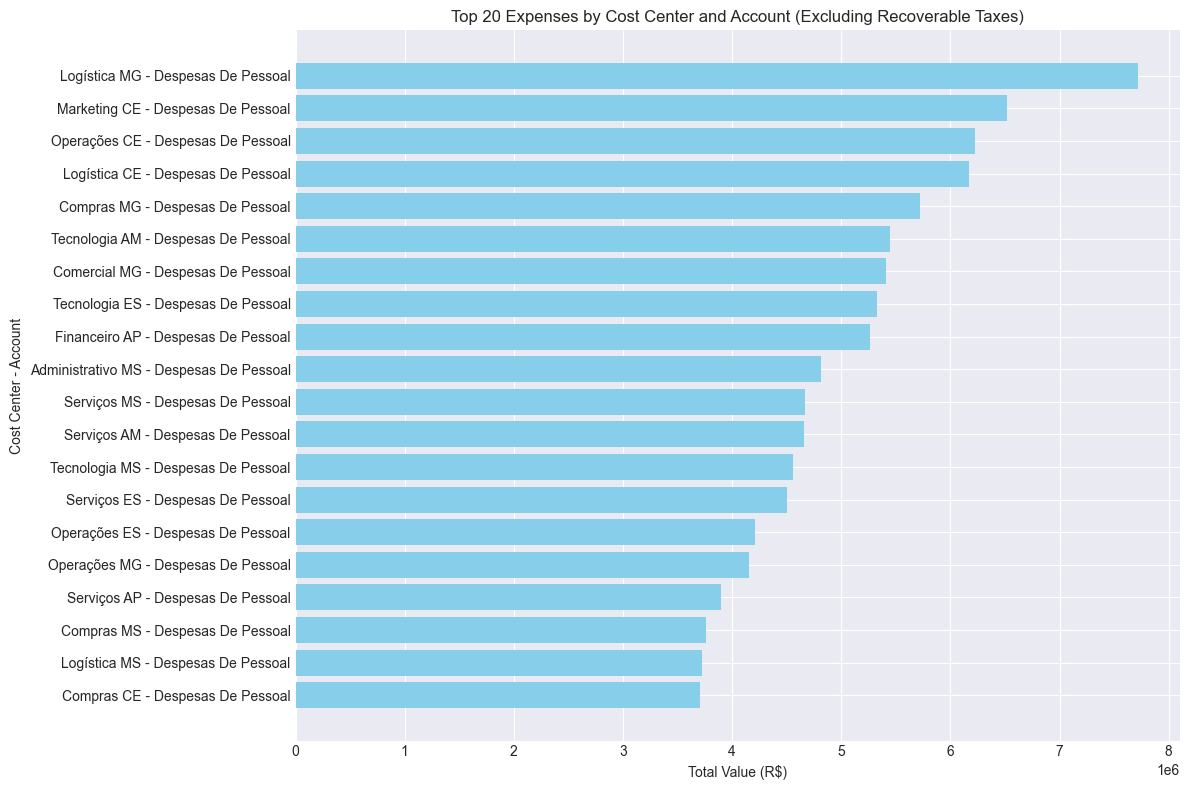

Plot generated successfully.


In [9]:
# First, ensure plotting libraries are installed in your Python 3.9 environment
try:
    import matplotlib.pyplot as plt
    import pandas as pd
    print("Matplotlib and Pandas already available.")
except ImportError:
    print("Installing matplotlib...")
    %pip install matplotlib
    import matplotlib.pyplot as plt
    import pandas as pd

from pyspark.sql.functions import col

print("\n--- Further Refining Expenses: Excluding 'Impostos Recuperáveis' ---")

# Ensure the expenses DataFrame exists
if "expenses_df" not in globals():
     raise NameError("DataFrame 'expenses_df' not found. Rerun Cell 7.")

# Apply the exclusion filter
try:
    # Filter where desc_conta is NOT EQUAL (!=) to 'Impostos Recuperáveis'
    refined_expenses_df = expenses_df.filter(col("desc_conta") != "Impostos Recuperáveis")
    
    print("Excluded 'Impostos Recuperáveis' successfully.")
    
    print("\n--- INSIGHT FINAL (Gastos): TOP 20 por Centro de Custo e Conta ---")
    # Show the refined results
    refined_expenses_df.show(20, truncate=False)

except Exception as e:
    print(f"!!! Error applying exclusion filter: {e}. !!!")
    refined_expenses_df = expenses_df # Use previous df if error

print("\n--- Preparing Data for Plotting ---")
# --- Conversão Spark -> Pandas ---
# Plotting directly from PySpark is limited. For richer plots (like matplotlib),
# we often convert a SMALLER, aggregated Spark DataFrame (.limit(N)) into a Pandas DataFrame.
# WARNING: Only do this (.toPandas()) on data that FITS in your machine's memory!
# Our aggregated data (top 20) is small enough.
try:
    # Get the top N results as a Pandas DataFrame
    top_n = 20
    expenses_pandas_df = refined_expenses_df.limit(top_n).toPandas()
    
    # Combine descriptions for plot labels if needed (optional)
    expenses_pandas_df['label'] = expenses_pandas_df['desc_ccusto'] + ' - ' + expenses_pandas_df['desc_conta']
    
    print(f"Top {top_n} results converted to Pandas DataFrame for plotting.")
    # Display the pandas df head
    print("\nPandas DataFrame Head:")
    print(expenses_pandas_df.head().to_string())

except Exception as e:
    print(f"!!! Error converting Spark DataFrame to Pandas: {e}. Plotting skipped. !!!")
    expenses_pandas_df = None # Skip plotting if conversion fails

# --- Plotting with Matplotlib ---
if expenses_pandas_df is not None and not expenses_pandas_df.empty:
    print("\n--- Generating Bar Chart (Top Expenses) ---")
    
    # Ensure valor_total is numeric
    expenses_pandas_df['valor_total'] = pd.to_numeric(expenses_pandas_df['valor_total'])
    
    # Sort by value for correct plot order (highest first)
    expenses_pandas_df = expenses_pandas_df.sort_values(by='valor_total', ascending=False)
    
    plt.style.use('seaborn-v0_8-darkgrid') # Nice style
    plt.figure(figsize=(12, 8)) # Adjust figure size
    
    # Create horizontal bar chart
    bars = plt.barh(expenses_pandas_df['label'], expenses_pandas_df['valor_total'], color='skyblue')
    
    plt.xlabel('Total Value (R$)')
    plt.ylabel('Cost Center - Account')
    plt.title(f'Top {top_n} Expenses by Cost Center and Account (Excluding Recoverable Taxes)')
    plt.gca().invert_yaxis() # Display highest value at the top
    
    # Add value labels on bars (optional)
    #for bar in bars:
    #    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
    #             f' R$ {bar.get_width():,.2f}', 
    #             va='center', ha='left')
             
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show() # Display the plot directly in the notebook output
    
    print("Plot generated successfully.")
else:
    print("Skipping plot generation due to previous errors or empty data.")



## 8. Additional Insight: Time Series Analysis (Volume by Month)

To gain a comprehensive understanding of business dynamics, we perform a time series analysis across the entire dataset. This aggregation calculates the total volume of all accounting entries (`valor` column) by month and year. This is crucial for identifying trends, seasonality, or anomalies in the SKZ Oberle group's transactions.

The analysis groups the primary entries DataFrame (`df_ctlancto_limpo`) by time dimensions (Year and Month) and sums the total value, which is then visualized using a line chart.

--- Starting Time Series Analysis (Monthly Volume) ---
Aggregation complete. Converting to Pandas for plotting...
Analysis completed in 3.49 seconds.

--- Generating Line Chart (Total Monthly Volume) ---


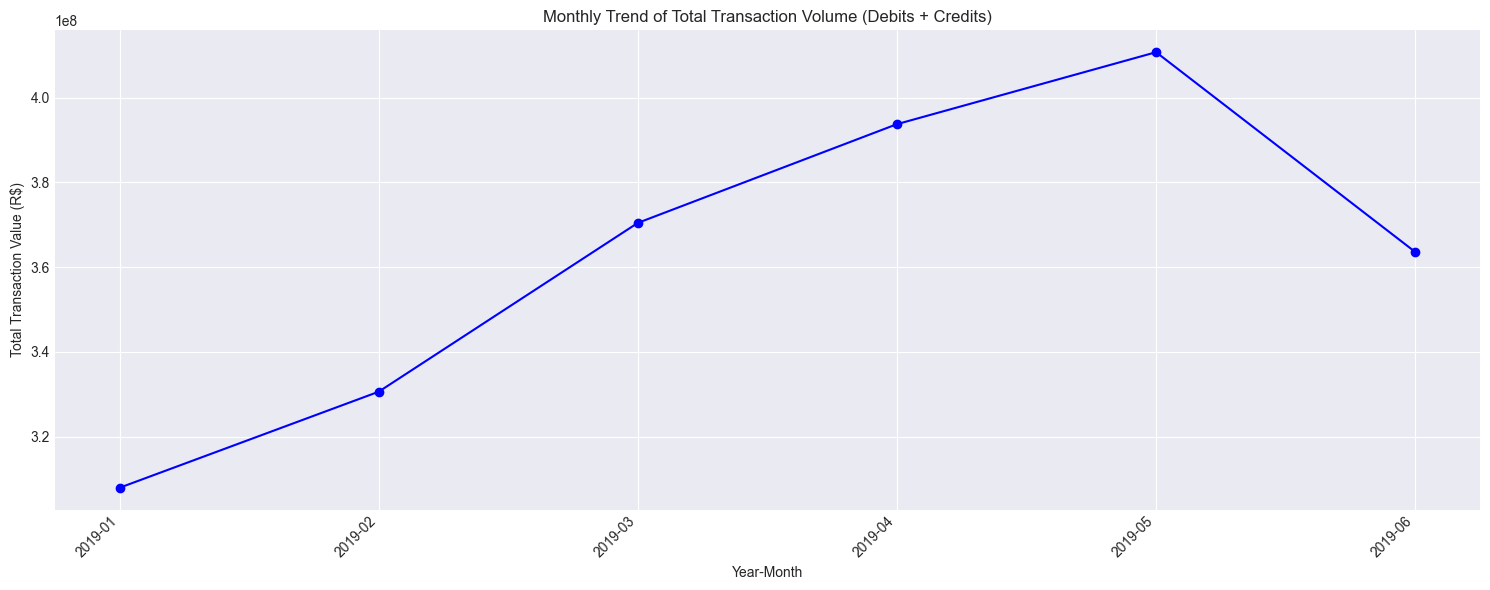

Time series plot generated successfully.


In [10]:
from pyspark.sql.functions import sum, year, month, col, concat, lit
import matplotlib.pyplot as plt
import pandas as pd
import time

print("--- Starting Time Series Analysis (Monthly Volume) ---")
start_time = time.time()

# 1. Agregação por Ano e Mês
monthly_trend_df = (
    df_ctlancto_limpo
    .withColumn("Year", year(col("data_lan_dt")))
    .withColumn("Month", month(col("data_lan_dt")))
    .groupBy("Year", "Month")
    .agg(
        sum("valor").alias("Monthly_Total_Value")
    )
    .orderBy("Year", "Month") # Sort chronologically
)

print("Aggregation complete. Converting to Pandas for plotting...")

# 2. Conversão para Pandas (Apenas 60 meses de dados)
monthly_trend_pandas = monthly_trend_df.toPandas()

# 3. Criação do Rótulo Temporal para o gráfico
monthly_trend_pandas['Date_Label'] = monthly_trend_pandas['Year'].astype(str) + '-' + monthly_trend_pandas['Month'].astype(str).str.zfill(2)

print(f"Analysis completed in {time.time() - start_time:.2f} seconds.")


# --- Plotting with Matplotlib ---
if monthly_trend_pandas is not None and not monthly_trend_pandas.empty:
    print("\n--- Generating Line Chart (Total Monthly Volume) ---")
    
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(15, 6))
    
    # Create the line chart
    plt.plot(monthly_trend_pandas['Date_Label'], monthly_trend_pandas['Monthly_Total_Value'], marker='o', linestyle='-', color='b')
    
    plt.xlabel('Year-Month')
    plt.ylabel('Total Transaction Value (R$)')
    plt.title('Monthly Trend of Total Transaction Volume (Debits + Credits)')
    
    # Rotate labels to prevent overlap
    plt.xticks(rotation=45, ha='right') 
    
    plt.grid(True)
    plt.tight_layout()
    plt.show() # Display the plot
    
    print("Time series plot generated successfully.")
else:
    print("Skipping time series plot generation due to empty data.")

## 9. Additional Insight: Comparative Analysis by Tax Regime

To understand how transaction volume is distributed across the different entities managed by SKZ Oberle, we perform a comparative analysis based on the Tax Regime (`regime`). This insight helps identify which segments of the client portfolio generate the highest volume of financial activity.

The analysis requires joining the cleaned accounting entries (`df_ctlancto_limpo`) with the company registry (`df_geempre`) and then aggregating the total transaction value by the `regime` column, which is then visualized using a pie chart.

--- Starting Comparative Analysis (Volume by Tax Regime) ---
Join with Company Registry (df_geempre) completed.
Aggregation complete. Converting to Pandas for plotting...
Analysis completed in 1.08 seconds.

--- Generating Pie Chart (Volume by Tax Regime) ---
Pie chart generated and saved successfully to tax_regime_volume_pie.png.


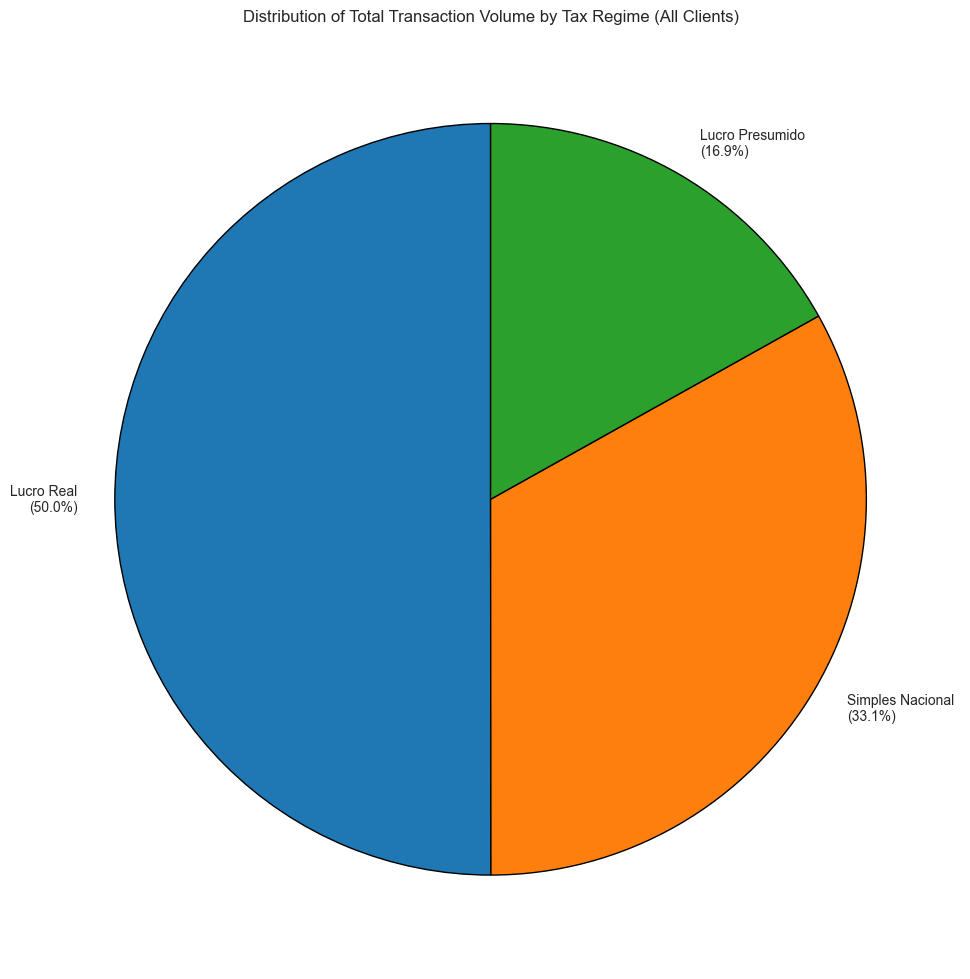

In [13]:
from pyspark.sql.functions import sum, col
import matplotlib.pyplot as plt
import pandas as pd
import time

print("--- Starting Comparative Analysis (Volume by Tax Regime) ---")
start_time = time.time()

# 1. Joins: Entries (df_ctlancto_limpo) with Company Registry (df_geempre)
# Junta os lançamentos com o cadastro da empresa para pegar o regime tributário
regime_analysis_df = (
    df_ctlancto_limpo
    .join(df_geempre, df_ctlancto_limpo["codi_emp"] == df_geempre["codi_emp"], "inner")
    .select(df_geempre["regime"], df_ctlancto_limpo["valor"])
)
print("Join with Company Registry (df_geempre) completed.")


# 2. Agregação por Regime
regime_volume_df = (
    regime_analysis_df
    .groupBy("regime")
    .agg(
        sum("valor").alias("Total_Volume")
    )
    .orderBy(sum("valor"), ascending=False)
)

print("Aggregation complete. Converting to Pandas for plotting...")

# 3. Conversão para Pandas
regime_volume_pandas = regime_volume_df.toPandas()

print(f"Analysis completed in {time.time() - start_time:.2f} seconds.")


# --- Plotting with Matplotlib ---
if regime_volume_pandas is not None and not regime_volume_pandas.empty:
    print("\n--- Generating Pie Chart (Volume by Tax Regime) ---")
    
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(10, 10))
    
    # Calculate percentages for the plot labels (Regime Name + Percentage)
    total = regime_volume_pandas['Total_Volume'].sum()
    # Mantém o nome técnico (regime) e adiciona a porcentagem formatada
    labels = [f"{r}\n({v / total:.1%})" for r, v in zip(regime_volume_pandas['regime'], regime_volume_pandas['Total_Volume'])]
    
    # Create the pie chart
    plt.pie(
        regime_volume_pandas['Total_Volume'], 
        labels=labels, 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'}
    )
    
    plt.title('Distribution of Total Transaction Volume by Tax Regime (All Clients)')
    
    # Salva o plot
    plot_file = "tax_regime_volume_pie.png"
    plt.savefig(plot_file)
    print(f"Pie chart generated and saved successfully to {plot_file}.")

    plt.tight_layout()
    plt.show() # Display the plot
    
else:
    print("Skipping pie chart generation due to empty data.")

## 10. Additional Insight: Processing Load Trend (Transaction Count)

To quantify the scaling challenge for the SKZ Oberle data platform, we analyze the monthly growth in data volume by counting the number of entries. This metric directly translates to the processing load that our Apache Spark pipeline must handle over time. This trend analysis confirms the need for a horizontally scalable solution.

--- Starting Processing Load Analysis (Monthly Transaction Count) ---
Aggregation complete. Converting to Pandas for plotting...
Analysis completed in 1.78 seconds.

--- Generating Line Chart (Monthly Transaction Count) ---


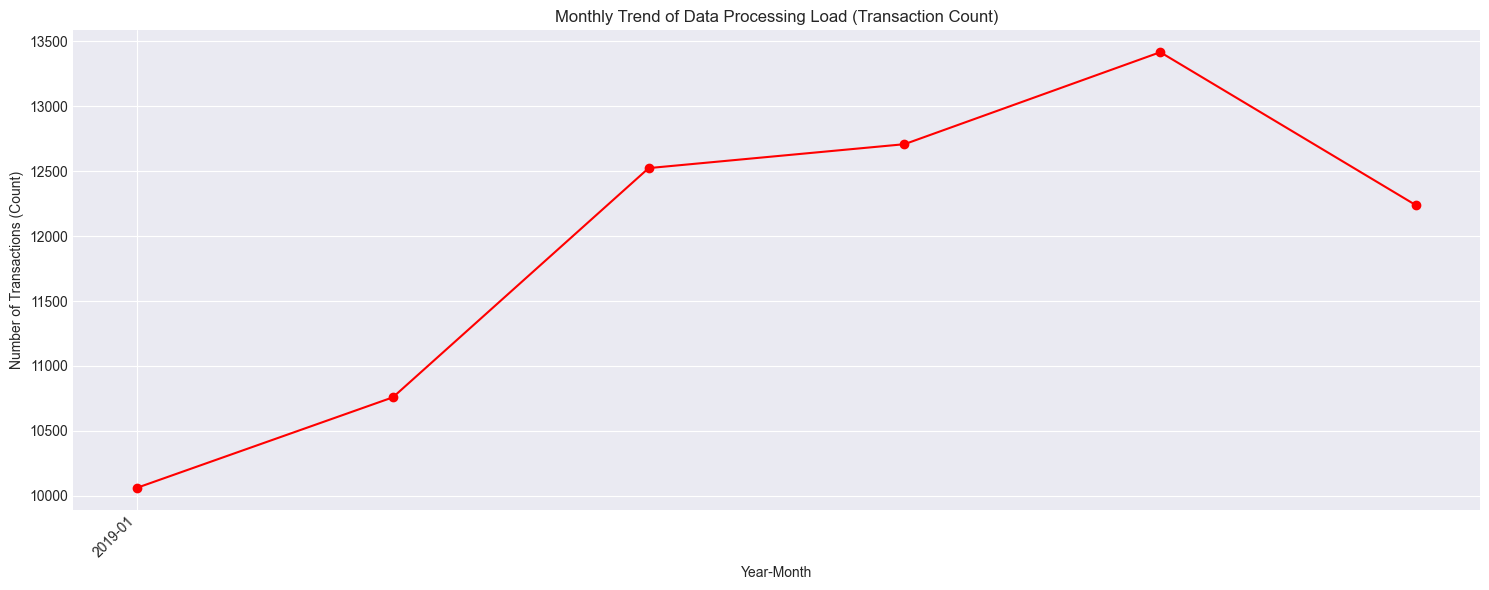

Transaction Count plot generated successfully.


In [10]:
from pyspark.sql.functions import count, year, month, col
import matplotlib.pyplot as plt
import pandas as pd
import time

print("--- Starting Processing Load Analysis (Monthly Transaction Count) ---")
start_time = time.time()

# 1. Agregação por Ano e Mês (Contando o número de lançamentos)
count_trend_df = (
    df_ctlancto_limpo
    .withColumn("Year", year(col("data_lan_dt")))
    .withColumn("Month", month(col("data_lan_dt")))
    .groupBy("Year", "Month")
    .agg(
        count("*").alias("Transaction_Count") # Use count("*") to count all rows
    )
    .orderBy("Year", "Month") # Sort chronologically
)

print("Aggregation complete. Converting to Pandas for plotting...")

# 2. Conversão para Pandas
count_trend_pandas = count_trend_df.toPandas()

# 3. Criação do Rótulo Temporal para o gráfico
count_trend_pandas['Date_Label'] = count_trend_pandas['Year'].astype(str) + '-' + count_trend_pandas['Month'].astype(str).str.zfill(2)

print(f"Analysis completed in {time.time() - start_time:.2f} seconds.")


# --- Plotting with Matplotlib ---
if count_trend_pandas is not None and not count_trend_pandas.empty:
    print("\n--- Generating Line Chart (Monthly Transaction Count) ---")
    
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(15, 6))
    
    # Create the line chart
    plt.plot(count_trend_pandas['Date_Label'], count_trend_pandas['Transaction_Count'], marker='o', linestyle='-', color='r')
    
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Transactions (Count)')
    plt.title('Monthly Trend of Data Processing Load (Transaction Count)')
    
    # Rotate labels to prevent overlap, showing every 6th label for clarity
    num_labels = len(count_trend_pandas)
    tick_positions = count_trend_pandas.index[::6] # Show every 6th tick
    tick_labels = count_trend_pandas['Date_Label'][::6]
    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45, ha='right') 

    plt.grid(True)
    plt.tight_layout()
    plt.show() # Display the plot
    
    print("Transaction Count plot generated successfully.")
else:
    print("Skipping count plot generation due to empty data.")

In [15]:
from pyspark.sql import SparkSession

print("Recriando SparkSession com driver JDBC no classpath...")

spark = (
    SparkSession.builder
    .appName("SKZ_Oberle_DMC_Analysis")
    .master("local[1]")  # reduz complexidade de rede
    .config("spark.driver.host", "localhost")
    .config("spark.driver.bindAddress", "localhost")
    .config("spark.ui.enabled", "false")
    # Carrega automaticamente o driver do PostgreSQL no DRIVER e EXECUTORES
    .config("spark.jars.packages", "org.postgresql:postgresql:42.7.3")
    .getOrCreate()
)

spark.sparkContext.setLogLevel("WARN")
print("✓ Spark pronto")

Recriando SparkSession com driver JDBC no classpath...
✓ Spark pronto


In [14]:
# CÉLULA: Escrever refined_expenses_df -> Neon/Postgres (gold_expenses_insights)
import os
from dotenv import load_dotenv
from pyspark.sql.functions import col

# 1) DATABASE_URL do .env (está um nível acima)
load_dotenv('../.env')
db_url = os.getenv('DATABASE_URL')
if not db_url:
    raise RuntimeError("DATABASE_URL não encontrada no .env")

# 2) JDBC URL + SSL (Neon exige)
jdbc_url = db_url.replace("postgresql://", "jdbc:postgresql://")
if "sslmode=" not in jdbc_url:
    sep = "&" if "?" in jdbc_url else "?"
    jdbc_url = f"{jdbc_url}{sep}sslmode=require"

print("JDBC URL OK (mascarado):", jdbc_url.split('@')[-1].split('?')[0], "(sslmode=require)")

# 3) Garante schema/colunas e tipos
to_write_df = (
    refined_expenses_df
    .select(
        col("desc_ccusto").cast("string"),
        col("desc_conta").cast("string"),
        col("valor_total").cast("decimal(18,2)")
    )
)

# 4) Escreve (append)
(
    to_write_df.write
    .format("jdbc")
    .option("url", jdbc_url)
    .option("dbtable", "gold_expenses_insights")
    .option("driver", "org.postgresql.Driver")
    .option("sslmode", "require")
    .mode("append")
    .save()
)

print("✅ Dados gravados em gold_expenses_insights (Neon)")

JDBC URL OK (mascarado): ep-odd-cake-a451ulap-pooler.us-east-1.aws.neon.tech/neondb (sslmode=require)


AnalysisException: [DATA_SOURCE_EXTERNAL_ERROR] Encountered error when saving to external data source. SQLSTATE: KD010